In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
import plotnine as p9
from sklearn.metrics import mean_squared_error

In [2]:
from warnings import simplefilter
simplefilter(action='ignore')

In [3]:
mentalh = pd.read_csv("GHSH_Pooled_Data1.csv")
mentalh

,Country,Year,Age Group,Sex,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Attempted_suicide
0,Argentina,2018,13-15,Female,50.3,30.7,27.8,7.9,41.5,24.7,25.7,16.8,17.2,NaN,27.5,4.8,19.9
1,Argentina,2018,13-15,Male,44.9,26.1,39.1,8.4,44.5,27.9,38.4,12.1,33.2,NaN,37.4,5.5,10.4
2,Argentina,2018,16-17,Female,67.2,56.3,22.5,21.9,37.1,34.0,59.1,28.5,15.1,NaN,30.1,6.3,17.4
3,Argentina,2018,16-17,Male,68.1,55.8,27.9,27.0,39.8,39.4,68.6,28.0,33.6,NaN,40.3,6.6,11.2
4,Argentina,2012,13-15,Male,49.3,28.9,35.9,10.6,46.2,32.0,43.5,17.0,44.2,42.1,24.8,6.1,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Vanuatu,2011,13-15,Female,5.8,4.7,13.6,1.9,20.2,44.6,8.4,8.2,41.8,66.5,57.4,14.3,19.5
102,Wallis and Futuna,2015,13-15,Male,32.2,35.5,60.5,4.0,36.3,32.7,32.0,25.7,48.7,30.2,51.2,4.1,14.7
103,Wallis and Futuna,2015,13-15,Female,24.4,27.1,63.0,2.0,36.3,16.2,13.6,29.9,22.9,30.9,41.7,3.3,16.9
104,Wallis and Futuna,2015,16-17,Male,48.3,53.7,57.8,10.1,36.5,38.9,55.7,40.0,49.6,23.6,54.5,7.3,9.0


In [4]:
mentalh = mentalh.dropna()
mentalh 
mentalh = mentalh.rename(columns={'Missed_classes_without_permssion': 'Missed_Classes_Without_Permssion', 
                                  'Had_sexual_relation': 'Had_Sexual_Relation', 'Smoke_cig_currently': 'Smoke_Cig_Currently', 
                                  'Had_fights': 'Had_Fights', 'Got_Seriously_injured': 'Got_Seriously_Injured', 
                                  'No_close_friends': 'No_Close_Friends', 'Attempted_suicide': 'Attempted_Suicide'})

In [5]:
mentalh.describe()

,Year,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_Classes_Without_Permssion,Had_Sexual_Relation,Smoke_Cig_Currently,Had_Fights,Bullied,Got_Seriously_Injured,No_Close_Friends,Attempted_Suicide
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2014.640000,30.85900,20.575000,23.229000,7.219000,32.624000,30.273000,25.898000,15.314000,32.680000,31.118000,44.092100,7.826000,14.473000
std,1.977244,54.75516,14.091694,16.045008,8.594251,11.627641,10.778185,16.989123,10.804919,15.543578,14.327817,15.067355,4.474227,9.506657
min,2010.000000,1.40000,0.800000,3.300000,0.000000,5.600000,6.500000,2.500000,1.200000,3.500000,9.900000,15.200000,1.500000,2.700000
25%,2013.000000,10.22500,8.350000,11.275000,1.900000,25.300000,22.750000,12.200000,6.875000,21.250000,21.575000,34.800000,4.375000,9.150000
50%,2015.000000,23.80000,18.200000,21.000000,4.100000,32.400000,29.200000,21.900000,12.350000,29.400000,26.850000,42.700000,7.050000,11.850000
75%,2016.000000,40.60000,29.050000,30.200000,8.750000,39.825000,36.900000,36.500000,21.600000,42.875000,41.650000,53.350000,10.000000,18.675000
max,2017.000000,548.00000,55.300000,70.600000,43.200000,63.900000,62.200000,73.900000,43.800000,76.500000,78.600000,87.700000,24.800000,67.200000


**Week One:**

Explanation of dataset origins, initial lit review, some initial data cleaning, exploratory data analysis including data visualizations.

In [6]:
mentalh = pd.get_dummies(mentalh, columns = ['Age Group', 'Sex'])
mentalh = mentalh.rename(columns = {'Age Group_13-15': 'Age_Group_13-15','Age Group_16-17': 'Age_Group_16-17'})
mentalh

,Country,Year,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_Classes_Without_Permssion,Had_Sexual_Relation,Smoke_Cig_Currently,Had_Fights,Bullied,Got_Seriously_Injured,No_Close_Friends,Attempted_Suicide,Age_Group_13-15,Age_Group_16-17,Sex_Female,Sex_Male
4,Argentina,2012,49.3,28.9,35.9,10.6,46.2,32.0,43.5,17.0,44.2,42.1,24.8,6.1,12.9,1,0,0,1
5,Argentina,2012,50.7,26.8,21.8,6.5,49.9,29.4,30.7,20.5,24.7,25.2,24.2,4.3,18.9,1,0,1,0
8,Benin,2016,38.0,19.3,12.7,0.8,35.7,18.8,31.8,5.1,32.1,47.4,48.4,10.8,14.4,1,0,0,1
9,Benin,2016,42.4,16.8,18.3,0.2,39.7,6.5,14.2,1.3,27.3,51.5,40.4,14.2,9.6,1,0,1,0
10,Benin,2016,46.5,29.6,3.3,2.1,33.3,17.3,35.7,6.9,28.8,43.3,51.0,9.7,13.4,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Vanuatu,2011,5.8,4.7,13.6,1.9,20.2,44.6,8.4,8.2,41.8,66.5,57.4,14.3,19.5,1,0,1,0
102,Wallis and Futuna,2015,32.2,35.5,60.5,4.0,36.3,32.7,32.0,25.7,48.7,30.2,51.2,4.1,14.7,1,0,0,1
103,Wallis and Futuna,2015,24.4,27.1,63.0,2.0,36.3,16.2,13.6,29.9,22.9,30.9,41.7,3.3,16.9,1,0,1,0
104,Wallis and Futuna,2015,48.3,53.7,57.8,10.1,36.5,38.9,55.7,40.0,49.6,23.6,54.5,7.3,9.0,0,1,0,1


In [7]:
mentalh.Country.unique()

array(['Argentina', 'Benin', 'Bhutan', 'Brunei Darussalam ',
 'Dominican Republic ', 'Fiji Islands', 'Indonesia', 'Jamaica',
 'Kiribati', 'Laos', 'Malaysia', 'Mauritus', 'Mongolia', 'Namibia',
 'Nepal', 'Peru', 'Samoa', 'Seychelles', 'Suriname', 'Thailand',
 'Timor-Leste ', 'Trinidad and Tobago ', 'Tuvalu ', 'Uruguay ',
 'Vanuatu ', 'Wallis and Futuna '], dtype=object)

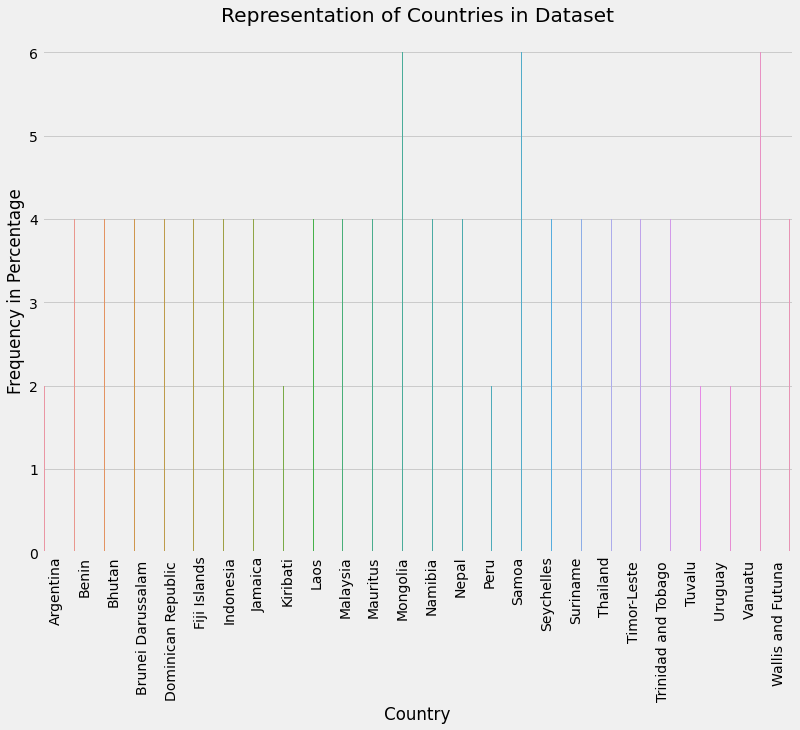

In [8]:
#Bar Chart
mentalh["Count"] = np.arange(1,101,1) 
#adding a column to keep track of how many values, difficult to utilize the index in pivot table
mental_piv = mentalh.pivot_table("Count", index="Country", aggfunc=pd.Series.nunique) 
mental_piv = mental_piv.reset_index() #reseting pivot table 
mentalh = mentalh.drop('Count', axis=1)
#removing this column to keep the data tidy as the column is equivalent to the index
plt.figure(figsize=(12,9))
sns.barplot(data = mental_piv, x = 'Country', y = 'Count', hue="Country")
plt.xlabel("Country")
plt.ylabel("Frequency in Percentage")
plt.title("Representation of Countries in Dataset")
plt.xticks(rotation=90)
plt.legend([], [], frameon=False)
plt.show()

**Bar Chart Caption:**
Argentina, Kiribati, Peru, Tuvalu, and Uruguay make up the smallest amount of representation in these countries while Mongolia, Samoa, and Vanuatu are represented the most. 

Data to use in Caption for Histogram: count    100.000000
mean      23.229000
std       16.045008
min        3.300000
25%       11.275000
50%       21.000000
75%       30.200000
max       70.600000
Name: Overwieght, dtype: float64


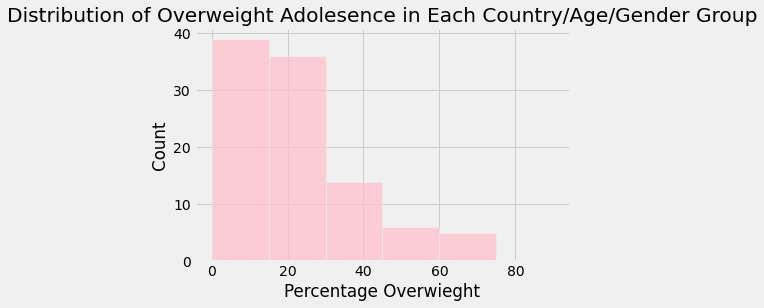

In [9]:
#Histogram - this should be left out

sns.histplot(mentalh["Overwieght"], bins = np.arange(0,101,15), color="pink")
plt.xlabel("Percentage Overwieght")
plt.title("Distribution of Overweight Adolesence in Each Country/Age/Gender Group")
plt.show()
data= mentalh["Overwieght"].describe()
print("Data to use in Caption for Histogram:", data)

**Histogram Caption:**
The center of this graph, when considering the mean, is 23.23%. The graph is not symetrical, it is skewed right. The largest mode is 0-15%. Considering the spread of the graph, the standard deviation is 16.05%, the range is 67.3%, and the IQR is (30.2-11.275) 18.93%. There are no unusual values.

Data to use in Caption for Histogram: count    100.000000
mean      31.118000
std       14.327817
min        9.900000
25%       21.575000
50%       26.850000
75%       41.650000
max       78.600000
Name: Bullied, dtype: float64


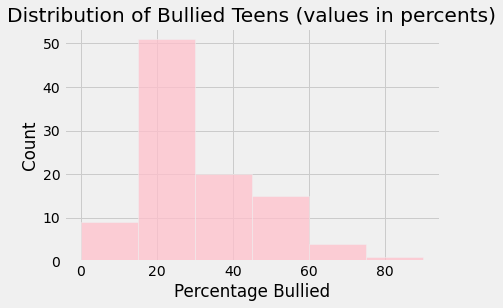

In [10]:
#Histogram

sns.histplot(mentalh["Bullied"], bins = np.arange(0,101,15), color="pink")
plt.xlabel("Percentage Bullied")
plt.title("Distribution of Bullied Teens (values in percents)")
plt.show()
data= mentalh["Bullied"].describe()
print("Data to use in Caption for Histogram:", data)

**Histogram Caption:** The center of this graph, when considering the mean, is 31.12%. The graph is not symmetrical, it is skewed right. The largest mode is 15-30%. Considering the spread of the graph, the standard deviation is 14.33%, the range is 68.7%, and the IQR is (41.65-21.575) 20.08%. There are no unusual values.

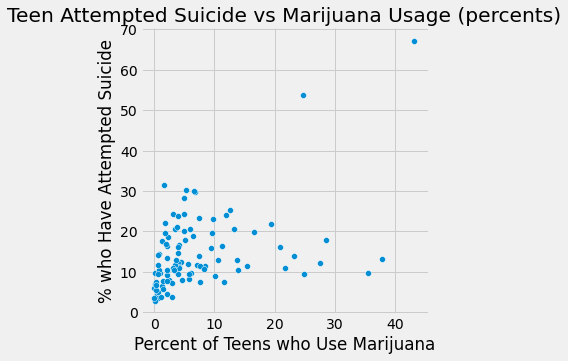

0.4297158442561854

In [11]:
#if attempted suicide is response, testing relationships
#Scatterplot
sns.relplot(data=mentalh, x='Use_Marijuana', y='Attempted_Suicide', kind='scatter')
plt.xlabel("Percent of Teens who Use Marijuana")
plt.ylabel("% who Have Attempted Suicide")
plt.title("Teen Attempted Suicide vs Marijuana Usage (percents)") 
plt.show()

mentalh['Use_Marijuana'].corr(mentalh['Attempted_Suicide'])

**Scatterplot Caption:**

There is a bit of a linear trend. There is an increase (positive direction) in percentage of teens who have attempted suicide as a the percent of teens who utilize weed increases. This relationship is of moderate strength as the correlation is just 0.43. There are some unusual values where the percentage of teens who have attempted suicide is higher than expected ~(25,55) and ~(43,67).

correlation 0.6638910734983569


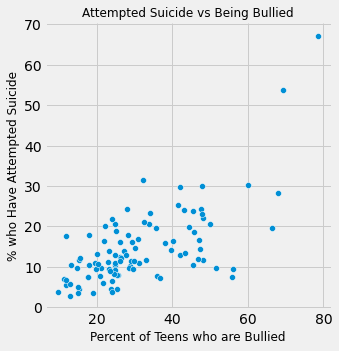

In [12]:
#Scatterplot
sns.relplot(data=mentalh, x='Bullied', y='Attempted_Suicide', kind='scatter')
plt.xlabel("Percent of Teens who are Bullied", fontsize = 12)
plt.ylabel("% who Have Attempted Suicide", fontsize = 12)
plt.title("Attempted Suicide vs Being Bullied", fontsize = 12) 
plt.show()
print("correlation", mentalh['Bullied'].corr(mentalh['Attempted_Suicide']))

**Scatterplot Caption:**

There is a linear trend. There is an increase (positive direction) in attempted suicide % as a higher percent of teens are bullied. This relationship is of higher strength as the correlation is just 0.66. There are no unusual values.

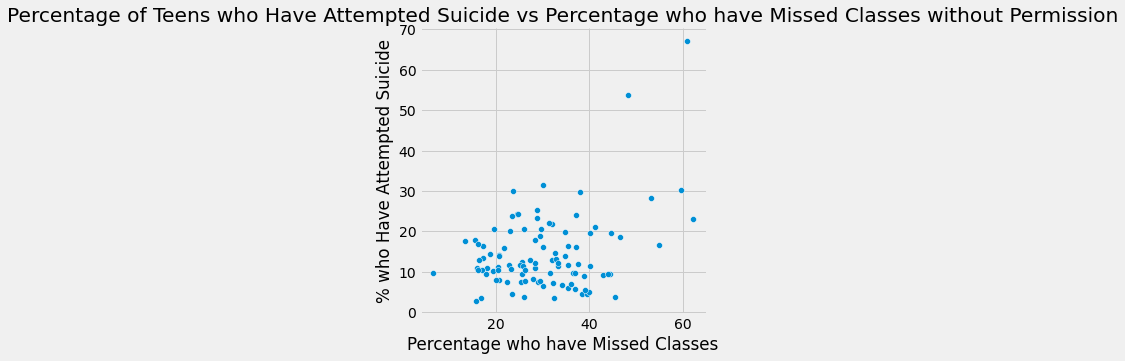

0.3530522369812133

In [13]:
#Scatterplot
sns.relplot(data=mentalh, x='Missed_Classes_Without_Permssion', y='Attempted_Suicide', kind='scatter')
plt.xlabel("Percentage who have Missed Classes")
plt.ylabel("% who Have Attempted Suicide")
plt.title("Percentage of Teens who Have Attempted Suicide vs Percentage who have Missed Classes without Permission") 
plt.show()
mentalh['Missed_Classes_Without_Permssion'].corr(mentalh['Attempted_Suicide'])

**Scatterplot Caption:**

There is a bit of a linear trend. There is an increase (positive direction) in percentage of teens who have attempted suicide as a the percent of teens who missed class without permission increases. This relationship is of weak strength as the correlation is just 0.35. There are some unusual values where the percentage of teens who have attempted suicide is higher than expected ~(50,55) and ~(61,67).

**Week Two:**
        
Selection of response variable, more exploratory data analysis including correlation
matrices and identification of possible collinear/multicollinear variables based on
dataset documentation

In [14]:
#Response Variable: The percent of teens surveyed who attempted suicide (Attempted_suicide)
corr = mentalh.corr()
corr

,Year,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_Classes_Without_Permssion,Had_Sexual_Relation,Smoke_Cig_Currently,Had_Fights,Bullied,Got_Seriously_Injured,No_Close_Friends,Attempted_Suicide,Age_Group_13-15,Age_Group_16-17,Sex_Female,Sex_Male
Year,1.000000e+00,0.171543,0.173470,0.100181,0.139145,0.024895,-0.199816,0.155110,-0.039194,-0.214888,-0.263084,-0.089851,0.173593,-0.189087,-2.793014e-01,2.793014e-01,1.117936e-15,-1.154335e-15
Currently_Drink_Alcohol,1.715427e-01,1.000000,0.348566,0.034048,0.307827,0.077462,-0.004900,0.411886,0.128407,0.048052,-0.028102,-0.000669,0.140255,0.099006,4.342974e-03,-4.342974e-03,-1.481075e-01,1.481075e-01
Really_Get_Drunk,1.734695e-01,0.348566,1.000000,0.161077,0.624900,0.118650,0.140044,0.763615,0.570963,0.076987,0.033170,0.111787,0.276148,0.298736,-3.499170e-01,3.499170e-01,-3.003340e-01,3.003340e-01
Overwieght,1.001807e-01,0.034048,0.161077,1.000000,0.116044,0.065477,0.092603,0.081378,0.246391,0.194235,-0.008007,-0.044277,0.061892,0.298063,1.495256e-01,-1.495256e-01,8.675455e-02,-8.675455e-02
Use_Marijuana,1.391452e-01,0.307827,0.624900,0.116044,1.000000,0.078705,0.269544,0.649461,0.537644,0.379017,0.172866,0.347453,0.294782,0.429716,-1.355336e-01,1.355336e-01,-3.380823e-01,3.380823e-01
Have_Understanding_Parents,2.489546e-02,0.077462,0.118650,0.065477,0.078705,1.000000,-0.473974,0.061028,-0.126714,-0.076031,-0.037204,-0.214949,0.013899,-0.077727,1.507490e-02,-1.507490e-02,4.114317e-02,-4.114317e-02
Missed_Classes_Without_Permssion,-1.998162e-01,-0.004900,0.140044,0.092603,0.269544,-0.473974,1.000000,0.288123,0.509576,0.417968,0.365655,0.384924,0.087632,0.353052,-1.529076e-01,1.529076e-01,-3.365299e-01,3.365299e-01
Had_Sexual_Relation,1.551095e-01,0.411886,0.763615,0.081378,0.649461,0.061028,0.288123,1.000000,0.420603,0.329267,0.270741,0.398894,0.448615,0.438344,-2.905205e-01,2.905205e-01,-4.550412e-01,4.550412e-01
Smoke_Cig_Currently,-3.919373e-02,0.128407,0.570963,0.246391,0.537644,-0.126714,0.509576,0.420603,1.000000,0.439856,0.166785,0.403950,0.071488,0.273761,-2.041262e-01,2.041262e-01,-5.000577e-01,5.000577e-01
Had_Fights,-2.148878e-01,0.048052,0.076987,0.194235,0.379017,-0.076031,0.417968,0.329267,0.439856,1.000000,0.537206,0.660526,0.301415,0.357026,2.703450e-01,-2.703450e-01,-5.788306e-01,5.788306e-01


In [15]:
matrix = corr.unstack()
matrix = matrix[abs(matrix) >= 0.6]
matrix = matrix.to_frame()

matrix = matrix.rename(columns = {'level_0':'Variables 1', 'level_1':'Variables 2', 0: 'Correlation'})
matrix = matrix[matrix.Correlation != 1]
matrix

Correlation 
 
 
 
 
 Really_Get_Drunk 
 Use_Marijuana 
 0.624900 
 
 
 Had_Sexual_Relation 
 0.763615 
 
 
 Use_Marijuana 
 Really_Get_Drunk 
 0.624900 
 
 
 Had_Sexual_Relation 
 0.649461 
 
 
 Had_Sexual_Relation 
 Really_Get_Drunk 
 0.763615 
 
 
 Use_Marijuana 
 0.649461 
 
 
 Had_Fights 
 Got_Seriously_Injured 
 0.660526 
 
 
 Bullied 
 Got_Seriously_Injured 
 0.679644 
 
 
 Attempted_Suicide 
 0.663891 
 
 
 Got_Seriously_Injured 
 Had_Fights 
 0.660526 
 
 
 Bullied 
 0.679644 
 
 
 Attempted_Suicide 
 Bullied 
 0.663891 
 
 
 Age_Group_13-15 
 Age_Group_16-17 
 -1.000000 
 
 
 Age_Group_16-17 
 Age_Group_13-15 
 -1.000000 
 
 
 Sex_Female 
 Sex_Male 
 -1.000000 
 
 
 Sex_Male 
 Sex_Female 
 -1.000000

In [16]:

X = mentalh[['Year','Currently_Drink_Alcohol','Really_Get_Drunk','Overwieght','Use_Marijuana','Have_Understanding_Parents',
             'Missed_Classes_Without_Permssion','Had_Sexual_Relation','Smoke_Cig_Currently','Had_Fights',
             'Bullied','Got_Seriously_Injured','No_Close_Friends','Age_Group_16-17','Sex_Female']]

X = sm.add_constant(X)

from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = pd.DataFrame()
VIF["feature"] = X.columns
VIF["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
VIF

,feature,VIF
0,const,1.626779e+06
1,Year,1.548303e+00
2,Currently_Drink_Alcohol,1.377429e+00
3,Really_Get_Drunk,5.324765e+00
4,Overwieght,1.683159e+00
5,Use_Marijuana,2.489468e+00
6,Have_Understanding_Parents,1.709862e+00
7,Missed_Classes_Without_Permssion,2.775788e+00
8,Had_Sexual_Relation,6.026972e+00
9,Smoke_Cig_Currently,3.913734e+00


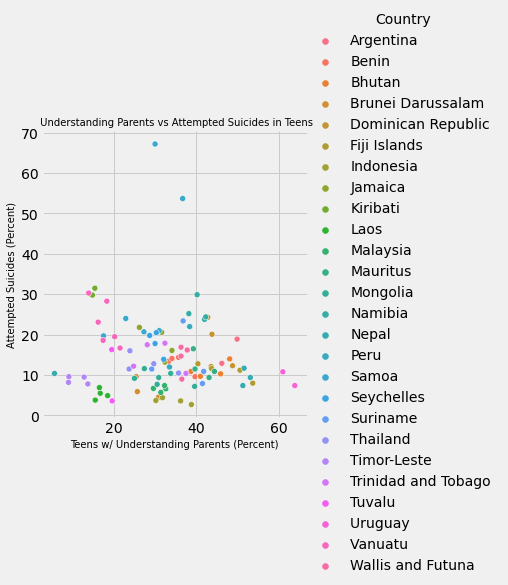

-0.07772726077086843

In [17]:
#Response Variable is Attempted Suicide

#Scatterplot
sns.relplot(data = mentalh, x='Have_Understanding_Parents', y='Attempted_Suicide', kind='scatter',hue="Country")
plt.xlabel("Teens w/ Understanding Parents (Percent)", fontsize = 10)
plt.ylabel("Attempted Suicides (Percent)", fontsize = 10)
plt.title(" Understanding Parents vs Attempted Suicides in Teens", fontsize = 10) 
plt.show()


mentalh['Have_Understanding_Parents'].corr(mentalh['Attempted_Suicide'])

**Scatterplot Caption:**

There may be a bit of a slight linear trend. There is a very slight decrease (negative direction) in the % of attempted suicides as the % of teens with understanding parents increases. This relationship is of weak strength as the correlation is just -.0777. There are two unusual values in Seychelles as the & of attempted suicides is higher than expected.

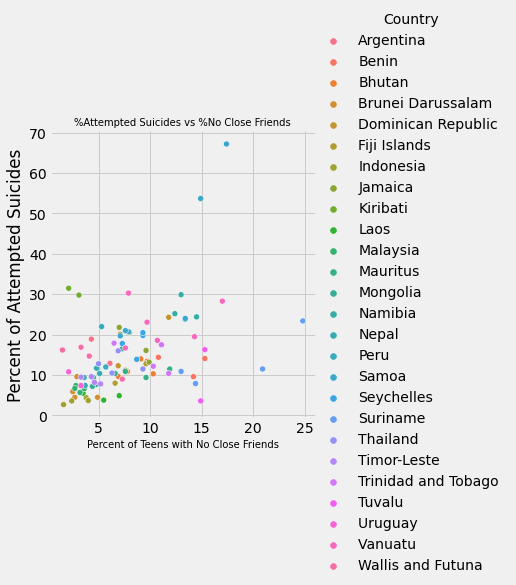

0.4574753222479406

In [18]:
#Scatterplot
sns.relplot(data=mentalh, x='No_Close_Friends', y='Attempted_Suicide', kind='scatter',hue="Country")
plt.xlabel("Percent of Teens with No Close Friends", fontsize= 10)
plt.ylabel("Percent of Attempted Suicides")
plt.title("%Attempted Suicides vs %No Close Friends", fontsize= 10) 
plt.show()


mentalh['No_Close_Friends'].corr(mentalh['Attempted_Suicide'])

**Scatterplot Caption:**

There may be a linear trend. There is an increase (positive direction) in the % of attempted suicides as the % of teens with no close friends increases. This relationship is of moderate strength and the correlation is .45747. There are no unusual values. 

**Week 3:**
Identification of appropriate type of model (classification vs. regression), initial passes
at multiple regression model fits. Analysis of residuals if using linear regression.

**Completed**
- Regression as our dependent variable is the difference in mean hourly percent (numerical)
- An r2 value of 0.752 shows an average level of correlation
- The VIF shows no multicollinearity

**Next Steps**
- Run backward selection to determine the best predictors, using an alpha value 0.05. 
- Use LASSO to verify that we have the most important predictors in our dataset.

**Completed V2:**
- Backward selection has an r2 value of 0.713. Verify with LASSO.

In [19]:
#Model Type: Regression - OLS
Y = mentalh.Attempted_Suicide
X1 = mentalh[['Year','Currently_Drink_Alcohol','Really_Get_Drunk','Overwieght','Use_Marijuana','Have_Understanding_Parents',
             'Missed_Classes_Without_Permssion','Had_Sexual_Relation','Smoke_Cig_Currently','Had_Fights',
             'Bullied','Got_Seriously_Injured','No_Close_Friends','Age_Group_16-17','Sex_Female']]


X1 = sm.add_constant(X1)

model1 = sm.OLS(Y,X1).fit()
model1.summary()

OLS Regression Results 
 
 Dep. Variable: Attempted_Suicide R-squared: 0.752 
 
 
 Model: OLS Adj. R-squared: 0.707 
 
 
 Method: Least Squares F-statistic: 16.95 
 
 
 Date: Tue, 23 May 2023 Prob (F-statistic): 2.10e-19 
 
 
 Time: 00:58:37 Log-Likelihood: -296.93 
 
 
 No. Observations: 100 AIC: 625.9 
 
 
 Df Residuals: 84 BIC: 667.5 
 
 
 Df Model: 15 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 const 1742.4926 655.917 2.657 0.009 438.130 3046.855 
 
 
 Year -0.8692 0.325 -2.672 0.009 -1.516 -0.222 
 
 
 Currently_Drink_Alcohol -0.0014 0.011 -0.122 0.903 -0.023 0.021 
 
 
 Really_Get_Drunk 0.0057 0.085 0.068 0.946 -0.163 0.174 
 
 
 Overwieght 0.1562 0.042 3.738 0.000 0.073 0.239 
 
 
 Use_Marijuana 0.2927 0.095 3.085 0.003 0.104 0.481 
 
 
 Have_Understanding_Parents -0.0522 0.058 -0.898 0.372 -0.168 0.063 
 
 
 Missed_Classes_Without_Permssion 0.0691 0.080 0.865 0.389 -0.090 0.228 
 
 
 Had_Sexual_Relation 0.1235 0.075 1.654 0.102 -0.025 0.272 
 
 
 Smoke_Cig_Currently 0.0089 0.095 0.094 0.926 -0.179 0.197 
 
 
 Had_Fights -0.1232 0.067 -1.851 0.068 -0.256 0.009 
 
 
 Bullied 0.2825 0.064 4.397 0.000 0.155 0.410 
 
 
 Got_Seriously_Injured 0.1090 0.067 1.636 0.106 -0.024 0.241 
 
 
 No_Close_Friends 0.2938 0.152 1.933 0.057 -0.008 0.596 
 
 
 Age_Group_16-17 -1.9232 1.467 -1.311 0.194 -4.841 0.995 
 
 
 Sex_Female 5.1820 1.750 2.962 0.004 1.703 8.661 
 
 
 
 
 Omnibus: 0.943 Durbin-Watson: 1.583 
 
 
 Prob(Omnibus): 0.624 Jarque-Bera (JB): 0.775 
 
 
 Skew: 0.216 Prob(JB): 0.679 
 
 
 Kurtosis: 2.984 Cond. No. 2.57e+06 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified. [2] The condition number is large, 2.57e+06. This might indicate that there are strong multicollinearity or other numerical problems.

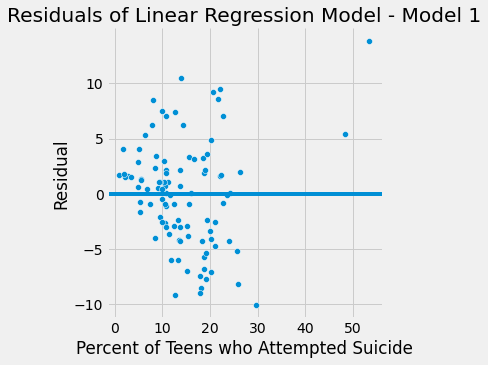

In [22]:
df_for_model = model1.fittedvalues.to_frame(name = 'Fitted')
df_for_model['Residuals'] = model1.resid

sns.relplot(data=df_for_model, x='Fitted', y='Residuals', kind='scatter')
plt.xlabel("Percent of Teens who Attempted Suicide")
plt.axhline(y=0) 
plt.ylabel("Residual")
plt.title("Residuals of Linear Regression Model - Model 1") 
plt.show()

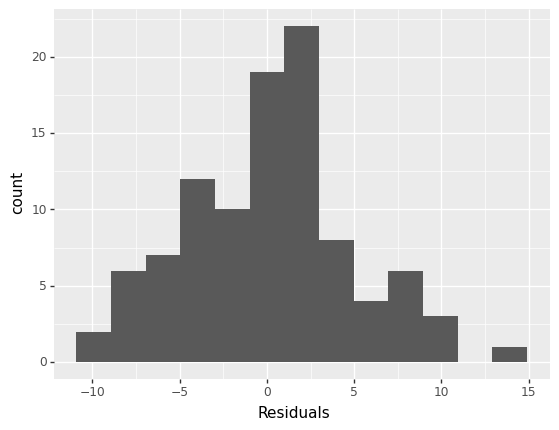

<ggplot: (8759421797286)>

In [23]:
(p9.ggplot(df_for_model, p9.aes(x = 'Residuals')) +
p9.geom_histogram(bins = 13) +
p9.xlab("Residuals"))

**Caption**: This histogram has slight symmetry, but it is has more a left skew than real symmetry. From the scatterplot, we see that the points are less condensed and more randomly scattered, indicating that the distance from the point to the best fitted line is larger than expected. Not a good model.

In [24]:
#Backwards Model Selction
#remove get really drunk
Y = mentalh.Attempted_Suicide
X2 = mentalh[['Year','Currently_Drink_Alcohol','Overwieght','Use_Marijuana','Have_Understanding_Parents',
             'Missed_Classes_Without_Permssion','Had_Sexual_Relation','Smoke_Cig_Currently','Had_Fights',
             'Bullied','Got_Seriously_Injured','No_Close_Friends','Age_Group_16-17','Sex_Female']]


X2 = sm.add_constant(X2)

model2 = sm.OLS(Y,X2).fit()
model2.summary()

OLS Regression Results 
 
 Dep. Variable: Attempted_Suicide R-squared: 0.752 
 
 
 Model: OLS Adj. R-squared: 0.711 
 
 
 Method: Least Squares F-statistic: 18.38 
 
 
 Date: Tue, 23 May 2023 Prob (F-statistic): 4.79e-20 
 
 
 Time: 01:00:56 Log-Likelihood: -296.94 
 
 
 No. Observations: 100 AIC: 623.9 
 
 
 Df Residuals: 85 BIC: 662.9 
 
 
 Df Model: 14 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 const 1744.5052 651.396 2.678 0.009 449.355 3039.656 
 
 
 Year -0.8702 0.323 -2.694 0.009 -1.513 -0.228 
 
 
 Currently_Drink_Alcohol -0.0014 0.011 -0.125 0.900 -0.023 0.021 
 
 
 Overwieght 0.1563 0.042 3.766 0.000 0.074 0.239 
 
 
 Use_Marijuana 0.2940 0.093 3.176 0.002 0.110 0.478 
 
 
 Have_Understanding_Parents -0.0525 0.058 -0.911 0.365 -0.167 0.062 
 
 
 Missed_Classes_Without_Permssion 0.0675 0.075 0.894 0.374 -0.083 0.218 
 
 
 Had_Sexual_Relation 0.1268 0.057 2.230 0.028 0.014 0.240 
 
 
 Smoke_Cig_Currently 0.0126 0.076 0.166 0.868 -0.138 0.164 
 
 
 Had_Fights -0.1243 0.064 -1.935 0.056 -0.252 0.003 
 
 
 Bullied 0.2831 0.063 4.475 0.000 0.157 0.409 
 
 
 Got_Seriously_Injured 0.1075 0.063 1.712 0.091 -0.017 0.232 
 
 
 No_Close_Friends 0.2942 0.151 1.949 0.055 -0.006 0.594 
 
 
 Age_Group_16-17 -1.9202 1.458 -1.317 0.191 -4.819 0.979 
 
 
 Sex_Female 5.1858 1.739 2.983 0.004 1.729 8.642 
 
 
 
 
 Omnibus: 0.976 Durbin-Watson: 1.586 
 
 
 Prob(Omnibus): 0.614 Jarque-Bera (JB): 0.807 
 
 
 Skew: 0.220 Prob(JB): 0.668 
 
 
 Kurtosis: 2.983 Cond. No. 2.57e+06 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified. [2] The condition number is large, 2.57e+06. This might indicate that there are strong multicollinearity or other numerical problems.

In [25]:
#Backwards Model Selction
#remove get really drunk and currently drink alcohol
Y = mentalh.Attempted_Suicide
X3 = mentalh[['Year','Overwieght','Use_Marijuana','Have_Understanding_Parents',
             'Missed_Classes_Without_Permssion','Had_Sexual_Relation','Smoke_Cig_Currently','Had_Fights',
             'Bullied','Got_Seriously_Injured','No_Close_Friends','Age_Group_16-17','Sex_Female']]


X3 = sm.add_constant(X3)

model3 = sm.OLS(Y,X3).fit()
model3.summary()

OLS Regression Results 
 
 Dep. Variable: Attempted_Suicide R-squared: 0.752 
 
 
 Model: OLS Adj. R-squared: 0.714 
 
 
 Method: Least Squares F-statistic: 20.02 
 
 
 Date: Tue, 23 May 2023 Prob (F-statistic): 1.05e-20 
 
 
 Time: 01:00:57 Log-Likelihood: -296.94 
 
 
 No. Observations: 100 AIC: 621.9 
 
 
 Df Residuals: 86 BIC: 658.4 
 
 
 Df Model: 13 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 const 1756.5847 640.540 2.742 0.007 483.234 3029.935 
 
 
 Year -0.8762 0.318 -2.759 0.007 -1.508 -0.245 
 
 
 Overwieght 0.1570 0.041 3.834 0.000 0.076 0.238 
 
 
 Use_Marijuana 0.2938 0.092 3.192 0.002 0.111 0.477 
 
 
 Have_Understanding_Parents -0.0524 0.057 -0.916 0.362 -0.166 0.061 
 
 
 Missed_Classes_Without_Permssion 0.0676 0.075 0.901 0.370 -0.082 0.217 
 
 
 Had_Sexual_Relation 0.1241 0.052 2.376 0.020 0.020 0.228 
 
 
 Smoke_Cig_Currently 0.0118 0.075 0.157 0.876 -0.138 0.161 
 
 
 Had_Fights -0.1246 0.064 -1.954 0.054 -0.251 0.002 
 
 
 Bullied 0.2835 0.063 4.513 0.000 0.159 0.408 
 
 
 Got_Seriously_Injured 0.1087 0.062 1.762 0.082 -0.014 0.231 
 
 
 No_Close_Friends 0.2955 0.150 1.972 0.052 -0.002 0.593 
 
 
 Age_Group_16-17 -1.8754 1.405 -1.334 0.186 -4.669 0.918 
 
 
 Sex_Female 5.1644 1.720 3.002 0.004 1.745 8.584 
 
 
 
 
 Omnibus: 1.013 Durbin-Watson: 1.587 
 
 
 Prob(Omnibus): 0.603 Jarque-Bera (JB): 0.835 
 
 
 Skew: 0.224 Prob(JB): 0.659 
 
 
 Kurtosis: 2.987 Cond. No. 2.54e+06 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified. [2] The condition number is large, 2.54e+06. This might indicate that there are strong multicollinearity or other numerical problems.

In [26]:
#Backwards Model Selction

##remove get really drunk, currently drink alcohol, and smoke_cig_currently

Y = mentalh.Attempted_Suicide
X4 = mentalh[['Year','Overwieght','Use_Marijuana','Have_Understanding_Parents',
             'Missed_Classes_Without_Permssion','Had_Sexual_Relation','Had_Fights',
             'Bullied','Got_Seriously_Injured','No_Close_Friends','Age_Group_16-17','Sex_Female']]


X4 = sm.add_constant(X4)

model4 = sm.OLS(Y,X4).fit()
model4.summary()

OLS Regression Results 
 
 Dep. Variable: Attempted_Suicide R-squared: 0.752 
 
 
 Model: OLS Adj. R-squared: 0.717 
 
 
 Method: Least Squares F-statistic: 21.93 
 
 
 Date: Tue, 23 May 2023 Prob (F-statistic): 2.21e-21 
 
 
 Time: 01:00:57 Log-Likelihood: -296.96 
 
 
 No. Observations: 100 AIC: 619.9 
 
 
 Df Residuals: 87 BIC: 653.8 
 
 
 Df Model: 12 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 const 1774.0970 627.188 2.829 0.006 527.493 3020.701 
 
 
 Year -0.8849 0.311 -2.845 0.006 -1.503 -0.267 
 
 
 Overwieght 0.1595 0.037 4.255 0.000 0.085 0.234 
 
 
 Use_Marijuana 0.2996 0.084 3.574 0.001 0.133 0.466 
 
 
 Have_Understanding_Parents -0.0525 0.057 -0.921 0.360 -0.166 0.061 
 
 
 Missed_Classes_Without_Permssion 0.0700 0.073 0.959 0.340 -0.075 0.215 
 
 
 Had_Sexual_Relation 0.1227 0.051 2.397 0.019 0.021 0.224 
 
 
 Had_Fights -0.1256 0.063 -1.990 0.050 -0.251 -0.000 
 
 
 Bullied 0.2830 0.062 4.536 0.000 0.159 0.407 
 
 
 Got_Seriously_Injured 0.1110 0.060 1.858 0.067 -0.008 0.230 
 
 
 No_Close_Friends 0.2947 0.149 1.979 0.051 -0.001 0.591 
 
 
 Age_Group_16-17 -1.8146 1.343 -1.351 0.180 -4.485 0.855 
 
 
 Sex_Female 5.0664 1.594 3.179 0.002 1.899 8.234 
 
 
 
 
 Omnibus: 1.030 Durbin-Watson: 1.599 
 
 
 Prob(Omnibus): 0.598 Jarque-Bera (JB): 0.848 
 
 
 Skew: 0.225 Prob(JB): 0.655 
 
 
 Kurtosis: 2.990 Cond. No. 2.50e+06 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified. [2] The condition number is large, 2.5e+06. This might indicate that there are strong multicollinearity or other numerical problems.

In [27]:
#Backwards Model Selction

##remove get really drunk, currently drink alcohol, and, understanding parents, smoke_cig_currently

Y = mentalh.Attempted_Suicide
X5 = mentalh[['Year','Overwieght','Use_Marijuana',
             'Missed_Classes_Without_Permssion','Had_Sexual_Relation','Had_Fights',
             'Bullied','Got_Seriously_Injured','No_Close_Friends','Age_Group_16-17','Sex_Female']]


X5 = sm.add_constant(X5)

model5 = sm.OLS(Y,X5).fit()
model5.summary()

OLS Regression Results 
 
 Dep. Variable: Attempted_Suicide R-squared: 0.749 
 
 
 Model: OLS Adj. R-squared: 0.718 
 
 
 Method: Least Squares F-statistic: 23.89 
 
 
 Date: Tue, 23 May 2023 Prob (F-statistic): 6.58e-22 
 
 
 Time: 01:00:57 Log-Likelihood: -297.44 
 
 
 No. Observations: 100 AIC: 618.9 
 
 
 Df Residuals: 88 BIC: 650.2 
 
 
 Df Model: 11 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 const 1709.4385 622.710 2.745 0.007 471.932 2946.945 
 
 
 Year -0.8542 0.309 -2.765 0.007 -1.468 -0.240 
 
 
 Overwieght 0.1550 0.037 4.174 0.000 0.081 0.229 
 
 
 Use_Marijuana 0.2852 0.082 3.466 0.001 0.122 0.449 
 
 
 Missed_Classes_Without_Permssion 0.1092 0.059 1.842 0.069 -0.009 0.227 
 
 
 Had_Sexual_Relation 0.1200 0.051 2.350 0.021 0.019 0.222 
 
 
 Had_Fights -0.1302 0.063 -2.071 0.041 -0.255 -0.005 
 
 
 Bullied 0.2644 0.059 4.483 0.000 0.147 0.382 
 
 
 Got_Seriously_Injured 0.1284 0.057 2.269 0.026 0.016 0.241 
 
 
 No_Close_Friends 0.3085 0.148 2.084 0.040 0.014 0.603 
 
 
 Age_Group_16-17 -2.0504 1.318 -1.556 0.123 -4.669 0.568 
 
 
 Sex_Female 5.2403 1.581 3.315 0.001 2.098 8.382 
 
 
 
 
 Omnibus: 1.287 Durbin-Watson: 1.589 
 
 
 Prob(Omnibus): 0.526 Jarque-Bera (JB): 1.219 
 
 
 Skew: 0.264 Prob(JB): 0.544 
 
 
 Kurtosis: 2.886 Cond. No. 2.49e+06 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified. [2] The condition number is large, 2.49e+06. This might indicate that there are strong multicollinearity or other numerical problems.

In [28]:
#Backwards Model Selction

##remove get really drunk, currently drink alcohol, and, understanding parents, age group 16-17, smoke_cig_currently

Y = mentalh.Attempted_Suicide
X6 = mentalh[['Year','Overwieght','Use_Marijuana',
             'Missed_Classes_Without_Permssion','Had_Sexual_Relation','Had_Fights',
             'Bullied','Got_Seriously_Injured','No_Close_Friends','Sex_Female']]


X6 = sm.add_constant(X6)

model6 = sm.OLS(Y,X6).fit()
model6.summary()

OLS Regression Results 
 
 Dep. Variable: Attempted_Suicide R-squared: 0.742 
 
 
 Model: OLS Adj. R-squared: 0.713 
 
 
 Method: Least Squares F-statistic: 25.63 
 
 
 Date: Tue, 23 May 2023 Prob (F-statistic): 3.99e-22 
 
 
 Time: 01:00:57 Log-Likelihood: -298.80 
 
 
 No. Observations: 100 AIC: 619.6 
 
 
 Df Residuals: 89 BIC: 648.3 
 
 
 Df Model: 10 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 const 1895.6608 615.965 3.078 0.003 671.752 3119.570 
 
 
 Year -0.9468 0.306 -3.098 0.003 -1.554 -0.340 
 
 
 Overwieght 0.1676 0.037 4.591 0.000 0.095 0.240 
 
 
 Use_Marijuana 0.2937 0.083 3.549 0.001 0.129 0.458 
 
 
 Missed_Classes_Without_Permssion 0.0765 0.056 1.369 0.174 -0.035 0.188 
 
 
 Had_Sexual_Relation 0.0932 0.048 1.923 0.058 -0.003 0.189 
 
 
 Had_Fights -0.1164 0.063 -1.856 0.067 -0.241 0.008 
 
 
 Bullied 0.2897 0.057 5.070 0.000 0.176 0.403 
 
 
 Got_Seriously_Injured 0.1235 0.057 2.169 0.033 0.010 0.237 
 
 
 No_Close_Friends 0.3133 0.149 2.101 0.038 0.017 0.610 
 
 
 Sex_Female 4.8991 1.578 3.104 0.003 1.763 8.035 
 
 
 
 
 Omnibus: 1.647 Durbin-Watson: 1.530 
 
 
 Prob(Omnibus): 0.439 Jarque-Bera (JB): 1.351 
 
 
 Skew: 0.284 Prob(JB): 0.509 
 
 
 Kurtosis: 3.044 Cond. No. 2.44e+06 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified. [2] The condition number is large, 2.44e+06. This might indicate that there are strong multicollinearity or other numerical problems.

In [29]:

#Backwards Model Selction

#remove get really drunk, currently drink alcohol, and, understanding parents, age group 16-17, missed classes, smoke_cig_currently

Y = mentalh.Attempted_Suicide
X7 = mentalh[['Year','Overwieght','Use_Marijuana','Had_Sexual_Relation','Had_Fights',
             'Bullied','Got_Seriously_Injured','No_Close_Friends','Sex_Female']]


X7 = sm.add_constant(X7)

model7 = sm.OLS(Y,X7).fit()
model7.summary()

OLS Regression Results 
 
 Dep. Variable: Attempted_Suicide R-squared: 0.737 
 
 
 Model: OLS Adj. R-squared: 0.711 
 
 
 Method: Least Squares F-statistic: 28.00 
 
 
 Date: Tue, 23 May 2023 Prob (F-statistic): 1.79e-22 
 
 
 Time: 01:00:58 Log-Likelihood: -299.84 
 
 
 No. Observations: 100 AIC: 619.7 
 
 
 Df Residuals: 90 BIC: 645.7 
 
 
 Df Model: 9 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 const 2018.1135 612.390 3.295 0.001 801.493 3234.734 
 
 
 Year -1.0068 0.304 -3.313 0.001 -1.611 -0.403 
 
 
 Overwieght 0.1731 0.036 4.748 0.000 0.101 0.246 
 
 
 Use_Marijuana 0.3035 0.083 3.663 0.000 0.139 0.468 
 
 
 Had_Sexual_Relation 0.0975 0.049 2.007 0.048 0.001 0.194 
 
 
 Had_Fights -0.1139 0.063 -1.808 0.074 -0.239 0.011 
 
 
 Bullied 0.3024 0.057 5.339 0.000 0.190 0.415 
 
 
 Got_Seriously_Injured 0.1282 0.057 2.245 0.027 0.015 0.242 
 
 
 No_Close_Friends 0.2935 0.149 1.967 0.052 -0.003 0.590 
 
 
 Sex_Female 4.5939 1.570 2.926 0.004 1.475 7.713 
 
 
 
 
 Omnibus: 1.963 Durbin-Watson: 1.463 
 
 
 Prob(Omnibus): 0.375 Jarque-Bera (JB): 1.581 
 
 
 Skew: 0.304 Prob(JB): 0.454 
 
 
 Kurtosis: 3.097 Cond. No. 2.41e+06 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified. [2] The condition number is large, 2.41e+06. This might indicate that there are strong multicollinearity or other numerical problems.

In [30]:
#Backwards Model Selction

#remove get really drunk, currently drink alcohol, and, understanding parents, age group 16-17, missed classes, fights, smoke_cig_currently

Y = mentalh.Attempted_Suicide
X8 = mentalh[['Year','Overwieght','Use_Marijuana','Had_Sexual_Relation',
             'Bullied','Got_Seriously_Injured','No_Close_Friends','Sex_Female']]


X8 = sm.add_constant(X8)

model8 = sm.OLS(Y,X8).fit()
model8.summary()

OLS Regression Results 
 
 Dep. Variable: Attempted_Suicide R-squared: 0.727 
 
 
 Model: OLS Adj. R-squared: 0.703 
 
 
 Method: Least Squares F-statistic: 30.33 
 
 
 Date: Tue, 23 May 2023 Prob (F-statistic): 1.49e-22 
 
 
 Time: 01:00:58 Log-Likelihood: -301.63 
 
 
 No. Observations: 100 AIC: 621.3 
 
 
 Df Residuals: 91 BIC: 644.7 
 
 
 Df Model: 8 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 const 1681.2125 590.559 2.847 0.005 508.139 2854.286 
 
 
 Year -0.8403 0.293 -2.866 0.005 -1.423 -0.258 
 
 
 Overwieght 0.1442 0.033 4.347 0.000 0.078 0.210 
 
 
 Use_Marijuana 0.2666 0.081 3.280 0.001 0.105 0.428 
 
 
 Had_Sexual_Relation 0.1254 0.047 2.689 0.009 0.033 0.218 
 
 
 Bullied 0.2842 0.056 5.036 0.000 0.172 0.396 
 
 
 Got_Seriously_Injured 0.0868 0.053 1.638 0.105 -0.018 0.192 
 
 
 No_Close_Friends 0.2207 0.145 1.518 0.132 -0.068 0.510 
 
 
 Sex_Female 6.3381 1.254 5.056 0.000 3.848 8.828 
 
 
 
 
 Omnibus: 2.681 Durbin-Watson: 1.496 
 
 
 Prob(Omnibus): 0.262 Jarque-Bera (JB): 2.044 
 
 
 Skew: 0.285 Prob(JB): 0.360 
 
 
 Kurtosis: 3.408 Cond. No. 2.30e+06 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified. [2] The condition number is large, 2.3e+06. This might indicate that there are strong multicollinearity or other numerical problems.

In [31]:
#Backwards Model Selction

#remove get really drunk, currently drink alcohol, and, understanding parents, age group 16-17, missed classes, fights,
#smoke_cig_currently, no close friends

Y = mentalh.Attempted_Suicide
X9 = mentalh[['Year','Overwieght','Use_Marijuana','Had_Sexual_Relation',
             'Bullied','Got_Seriously_Injured','Sex_Female']]


X9 = sm.add_constant(X9)

model9 = sm.OLS(Y,X9).fit()
model9.summary()

OLS Regression Results 
 
 Dep. Variable: Attempted_Suicide R-squared: 0.720 
 
 
 Model: OLS Adj. R-squared: 0.699 
 
 
 Method: Least Squares F-statistic: 33.86 
 
 
 Date: Tue, 23 May 2023 Prob (F-statistic): 7.44e-23 
 
 
 Time: 01:00:58 Log-Likelihood: -302.88 
 
 
 No. Observations: 100 AIC: 621.8 
 
 
 Df Residuals: 92 BIC: 642.6 
 
 
 Df Model: 7 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 const 1461.7467 576.634 2.535 0.013 316.501 2606.993 
 
 
 Year -0.7312 0.286 -2.555 0.012 -1.300 -0.163 
 
 
 Overwieght 0.1439 0.033 4.307 0.000 0.078 0.210 
 
 
 Use_Marijuana 0.2683 0.082 3.277 0.001 0.106 0.431 
 
 
 Had_Sexual_Relation 0.1478 0.045 3.316 0.001 0.059 0.236 
 
 
 Bullied 0.3133 0.053 5.860 0.000 0.207 0.419 
 
 
 Got_Seriously_Injured 0.0831 0.053 1.559 0.122 -0.023 0.189 
 
 
 Sex_Female 6.6413 1.246 5.328 0.000 4.166 9.117 
 
 
 
 
 Omnibus: 2.291 Durbin-Watson: 1.476 
 
 
 Prob(Omnibus): 0.318 Jarque-Bera (JB): 1.721 
 
 
 Skew: 0.291 Prob(JB): 0.423 
 
 
 Kurtosis: 3.273 Cond. No. 2.23e+06 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified. [2] The condition number is large, 2.23e+06. This might indicate that there are strong multicollinearity or other numerical problems.

In [32]:
#Backwards Model Selction; FINAL

#remove get really drunk, currently drink alcohol, and, understanding parents, age group 16-17, missed classes, fights,
#smoke_cig_currently, no close friends, injured

Y = mentalh.Attempted_Suicide
X10 = mentalh[['Year','Overwieght','Use_Marijuana','Had_Sexual_Relation',
             'Bullied','Sex_Female']]


X10 = sm.add_constant(X10)

model10 = sm.OLS(Y,X10).fit()
model10.summary()

OLS Regression Results 
 
 Dep. Variable: Attempted_Suicide R-squared: 0.713 
 
 
 Model: OLS Adj. R-squared: 0.694 
 
 
 Method: Least Squares F-statistic: 38.50 
 
 
 Date: Tue, 23 May 2023 Prob (F-statistic): 3.70e-23 
 
 
 Time: 01:00:59 Log-Likelihood: -304.18 
 
 
 No. Observations: 100 AIC: 622.4 
 
 
 Df Residuals: 93 BIC: 640.6 
 
 
 Df Model: 6 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [0.025 0.975] 
 
 
 const 1391.4092 579.271 2.402 0.018 241.092 2541.726 
 
 
 Year -0.6952 0.287 -2.418 0.018 -1.266 -0.124 
 
 
 Overwieght 0.1405 0.034 4.183 0.000 0.074 0.207 
 
 
 Use_Marijuana 0.2886 0.081 3.544 0.001 0.127 0.450 
 
 
 Had_Sexual_Relation 0.1497 0.045 3.335 0.001 0.061 0.239 
 
 
 Bullied 0.3683 0.040 9.110 0.000 0.288 0.449 
 
 
 Sex_Female 6.0601 1.198 5.056 0.000 3.680 8.440 
 
 
 
 
 Omnibus: 2.787 Durbin-Watson: 1.509 
 
 
 Prob(Omnibus): 0.248 Jarque-Bera (JB): 2.151 
 
 
 Skew: 0.311 Prob(JB): 0.341 
 
 
 Kurtosis: 3.359 Cond. No. 2.22e+06 
 
 Notes: [1] Standard Errors assume that the covariance matrix of the errors is correctly specified. [2] The condition number is large, 2.22e+06. This might indicate that there are strong multicollinearity or other numerical problems.

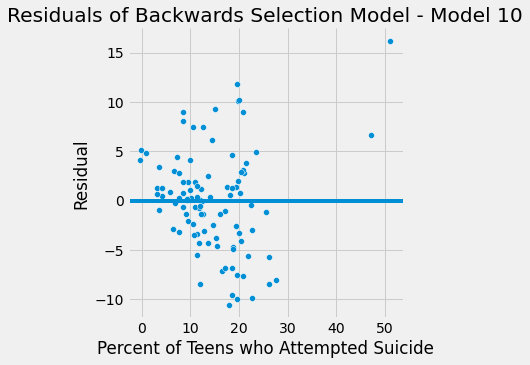

In [33]:
df_for_model = model10.fittedvalues.to_frame(name = 'Fitted')
df_for_model['Residuals'] = model10.resid

sns.relplot(data=df_for_model, x='Fitted', y='Residuals', kind='scatter')
plt.xlabel("Percent of Teens who Attempted Suicide")
plt.axhline(y=0) 
plt.ylabel("Residual")
plt.title("Residuals of Backwards Selection Model - Model 10") 
plt.show()

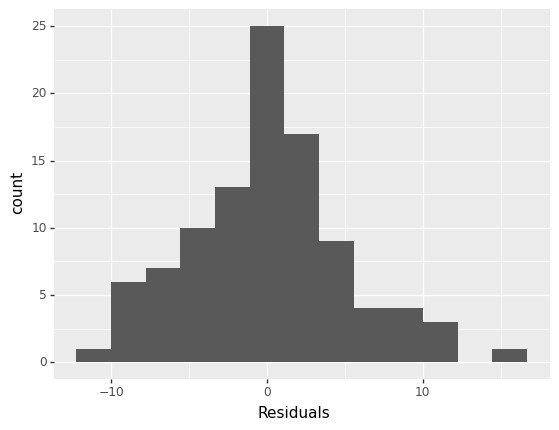

<ggplot: (8759422928912)>

In [34]:
(p9.ggplot(df_for_model, p9.aes(x = 'Residuals')) +
p9.geom_histogram(bins = 13) +
p9.xlab("Residuals"))

**Caption**: For the histogram, the residual graph is nearly symmetric, and although the scatter plot shows that the points are relatively randomly scattered, the points are more condensed around the line where y = 0, indicating that the distance between the best fit line and each observation has been minimized, thus, this model is a good fit.

In [35]:
model = LinearRegression()
model.fit(X10, Y)
y_2 = model.predict(X10)
print(y_2)

[22.71425587 17.46910943 14.04564165 19.59534314 12.17361091 18.77203391
 11.68416098 10.92926749 12.73735255  9.9046256   7.67071193 11.41728662
  4.04834335  9.45983269 12.28671147 12.66647306 12.01357807 15.00436768
 11.25273861 11.39145505 10.92921087 12.59673606  3.08143581  6.45983208
  3.06208581  3.62810819 17.11014631 14.43262268 20.82399521 19.81156864
 20.80765843 19.65681583 -0.26241131  3.4489772  -0.35587171  4.22087916
  6.81369173  9.4767693   0.90114712  5.85573971  9.58173624  8.47596543
 13.66334728  9.83276246  9.07209383 10.14730475  8.43448853  7.13855439
 10.69091731  9.35001092 19.81330843 21.02693493 21.4129245  25.5094173
 16.49605183 17.19588728 17.97125382 18.522065   19.52971548 22.40968266
 20.87425262 19.34974566 18.45623464 20.25753591 51.05882904 47.06426927
 22.74246985 26.20528345 18.83605482 26.22591238  8.49958262 12.22728249
 15.28522827 20.44930057 13.53361615 11.30485384 12.0300283   8.56469327
  6.57586173 10.53470118  9.32618203  7.56396497  7.

In [36]:
#unable to use negative mean squared error, but mean squared error is the same, just positive
cross_val_score(model, X10, Y, cv=10, scoring = "neg_mean_squared_error").mean()

-38.39899983316467

**Parameters left:**

Year, Overweight, Use_Marijuana, Had_Sexual_relation, Bullies, and Sex_Female

**Equation for the response variable, attempted_suicide:**

Attempted_suicide = 1391.4092 - (0.6952 * Year) + (0.1405 * Overweight) + (0.2886 * Use_Marijuana) + (0.1497 * Had_sexual_relation) + (0.3683 * Bullied) + (6.0601 * Sex_Female)

**Week 4:** Summaries of model fits (e.g., 𝑟2), analysis of important features (using LASSO or significance tests).

In [37]:
mentalh = mentalh.reset_index()

In [38]:
import random
from sklearn import preprocessing

X = mentalh[['Year','Currently_Drink_Alcohol','Really_Get_Drunk','Overwieght','Use_Marijuana','Have_Understanding_Parents',
             'Missed_Classes_Without_Permssion','Had_Sexual_Relation','Smoke_Cig_Currently','Had_Fights',
             'Bullied','Got_Seriously_Injured','No_Close_Friends','Age_Group_16-17','Sex_Female']]
Y = mentalh['Attempted_Suicide']

random.seed(600)
p30 = random.sample(range(mentalh.shape[0]-1), round(0.3*mentalh.shape[0]))
m_train =  mentalh.drop(p30)
m_test = mentalh.loc[p30]

X_train = m_train[['Year','Currently_Drink_Alcohol','Really_Get_Drunk','Overwieght','Use_Marijuana','Have_Understanding_Parents',
             'Missed_Classes_Without_Permssion','Had_Sexual_Relation','Smoke_Cig_Currently','Had_Fights',
             'Bullied','Got_Seriously_Injured','No_Close_Friends','Age_Group_16-17','Sex_Female']]
X_test = m_test[['Year','Currently_Drink_Alcohol','Really_Get_Drunk','Overwieght','Use_Marijuana','Have_Understanding_Parents',
             'Missed_Classes_Without_Permssion','Had_Sexual_Relation','Smoke_Cig_Currently','Had_Fights',
             'Bullied','Got_Seriously_Injured','No_Close_Friends','Age_Group_16-17','Sex_Female']] 
Y_test = m_test['Attempted_Suicide']
Y_train = m_train['Attempted_Suicide']

from sklearn.preprocessing import StandardScaler
lab = preprocessing.LabelEncoder()
Y_train = lab.fit_transform(Y_train)  

scaler = StandardScaler()
scaler.fit(X_train)



X_train_pp = pd.DataFrame(scaler.transform(X_train), columns = [['Year','Currently_Drink_Alcohol','Really_Get_Drunk','Overwieght','Use_Marijuana','Have_Understanding_Parents',
             'Missed_Classes_Without_Permssion','Had_Sexual_Relation','Smoke_Cig_Currently','Had_Fights',
             'Bullied','Got_Seriously_Injured','No_Close_Friends','Age_Group_16-17','Sex_Female']])

scaler.fit(X_test)
X_test_pp = pd.DataFrame(scaler.transform(X_test), columns = [['Year','Currently_Drink_Alcohol','Really_Get_Drunk','Overwieght','Use_Marijuana','Have_Understanding_Parents',
             'Missed_classes_without_permssion','Had_Cexual_Relation','Smoke_Cig_Currently','Had_Fights',
             'Bullied','Got_Seriously_Injured','No_Close_Friends','Age_Group_16-17','Sex_Female']])

models = sklearn.linear_model.LogisticRegression()
models.fit(X_train_pp, Y_train)

scaler.fit(X)
Xpp = pd.DataFrame(scaler.transform(X), columns = [['Year','Currently_Drink_Alcohol','Really_Get_Drunk','Overwieght','Use_Marijuana','Have_Understanding_Parents',
             'Missed_Classes_Without_Permssion','Had_Sexual_Relation','Smoke_Cig_Currently','Had_Fights',
             'Bullied','Got_Seriously_Injured','No_Close_Friends','Age_Group_16-17','Sex_Female']])


clf = LassoCV(alphas = np.arange(0.1, 100, 1), cv = 10).fit(X_train_pp.values, Y_train) 
clf.alpha_

2.1

In [39]:
#negated with -1 because of difficulty importing negative mean squared error
cross_val_score(models, X_test, Y_test, cv=10, scoring = "neg_mean_squared_error").mean()

nan

In [40]:
threshold = np.arange(0.1, 100, 1)
coef = pd.DataFrame()
for value in threshold:
    model = sklearn.linear_model.LogisticRegression(penalty='l1', solver = 'liblinear', C=value)
    model1 = model.fit(X_train_pp, Y_train)
    coef = pd.concat([coef, pd.Series(model1.coef_[0]).to_frame().T], ignore_index=True)

    
lasso_plt = coef


lasso_plt.rename(columns={0:'Year',1:'Currently_Drink_Alcohol',2:'Really_Get_Drunk',3:'Overwieght',4:'Use_Marijuana',
                           5:'Have_Understanding_Parents', 6:'Missed_Classes_Without_Permssion',7:'Had_Sexual_Relation',
                           8:'Smoke_Cig_Currently',9:'Had_Fights',10:'Bullied',11:'Got_Seriously_Injured',
                           12:'No_close_Friends',13:'Age_Group_16-17',14:'Sex_Female'}, inplace = True)

lasso_plt['Threshold'] = threshold

lasso_plt_melt = pd.melt(lasso_plt, id_vars = 'Threshold',
var_name = 'Variable', value_name = 'Coefficient')

maxx = lasso_plt_melt['Threshold'].loc[lasso_plt_melt.shape[0]-1]
labell = lasso_plt_melt[(lasso_plt_melt['Threshold'] == maxx)]

predictors = lasso_plt[lasso_plt['Threshold'] == 2.1]

predictors.loc[:,(predictors != 0).any()]

,Really_Get_Drunk,Missed_Classes_Without_Permssion,Got_Seriously_Injured,No_close_Friends,Age_Group_16-17,Threshold
2,-0.57785,-0.760922,-0.676457,-0.121533,0.785279,2.1


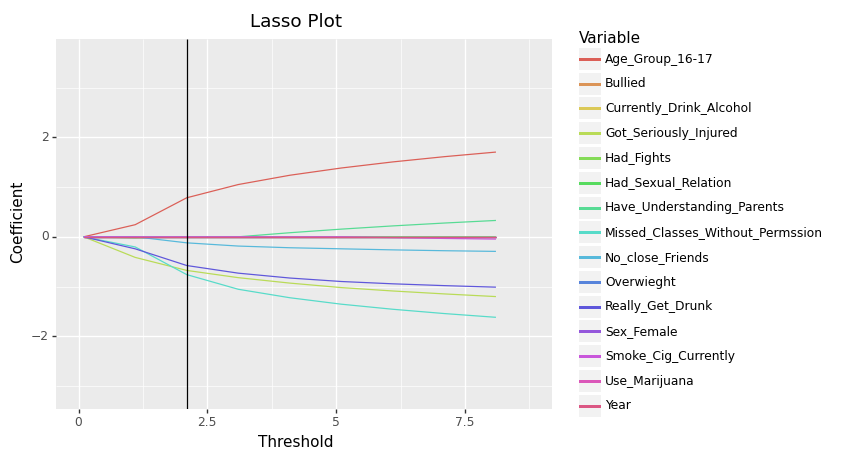

<ggplot: (8759423159281)>

In [41]:

(p9.ggplot(lasso_plt_melt, p9.aes(x = 'Threshold', y = 'Coefficient',
color = 'Variable')) 
+ p9.geom_line()
+ p9.scale_x_continuous(limits = [0, 8.75]) 
+ p9.geom_vline(xintercept = clf.alpha_)
+ p9.ggtitle("Lasso Plot")
)

**Plot Caption:**
The Lasso plot shows that some parameters never enter the model. At our selected threshold of 1, Age_Group_16-17, Missed_Classes_Without_Permission, Got_Seriously_injured, Really_Getting_Drunk

In [42]:
cross_val_score(model1, X_test_pp, Y_test, cv=10, scoring = "neg_mean_squared_error").mean()

nan

**Week 5:**
Initial passes at ridge regression, 𝑘NN classification or regression models

In [43]:
#RIDGE
from sklearn.linear_model import RidgeCV
X = mentalh[['Year','Currently_Drink_Alcohol','Really_Get_Drunk','Overwieght','Use_Marijuana','Have_Understanding_Parents',
             'Missed_Classes_Without_Permssion','Had_Sexual_Relation','Smoke_Cig_Currently','Had_Fights',
             'Bullied','Got_Seriously_Injured','No_Close_Friends','Age_Group_16-17','Sex_Female']]

scaler = StandardScaler()
scaler.fit(X)

X_pp = pd.DataFrame(scaler.transform(X), columns =[['Year','Currently_Drink_Alcohol','Really_Get_Drunk','Overwieght','Use_Marijuana','Have_Understanding_Parents',
             'Missed_Classes_Without_Permssion','Had_Sexual_Relation','Smoke_Cig_Currently','Had_Fights',
             'Bullied','Got_Seriously_Injured','No_Close_Friends','Age_Group_16-17','Sex_Female']])

cl = RidgeCV(alphas = np.arange(0.1, 100, 1), cv = 10).fit(X_pp, Y)
cl.score(X_pp, Y)
print("classifier alpha value", cl.alpha_)

alphas = np.arange(0.1, 100, 1)
Threshold = []
ridge = pd.DataFrame()
for threshold in alphas:
    model = sklearn.linear_model.Ridge(alpha = threshold)
    tempmodel = model.fit(X_pp, Y)
    ridge = pd.concat([ridge, pd.Series(tempmodel.coef_).to_frame().T])
    Threshold.append(np.log(1/threshold))
    
ridge_plt = ridge
ridge_plt.rename(columns={0:'Year',1:'Currently_Drink_Alcohol',2:'Really_Get_Drunk',3:'Overwieght',4:'Use_Marijuana',
                           5:'Have_Understanding_Parents', 6:'Missed_Classes_Without_Permssion',7:'Had_Sexual_Relation',
                           8:'Smoke_Cig_Currently',9:'Had_Fights',10:'Bullied',11:'Got_Seriously_Injured',
                           12:'No_Close_Friends',13:'Age_Group_16-17',14:'Sex_Female'}, 
                                 inplace = True)
ridge_plt['Threshold'] = Threshold
ridge_plt_melt = pd.melt(ridge_plt, id_vars = 'Threshold',
                                var_name = 'Variable', value_name = 'Coefficient')
max_T = ridge_plt_melt['Threshold'].loc[0]
plt_label = ridge_plt_melt[(ridge_plt_melt['Threshold'] == max_T)]


classifier alpha value 41.1


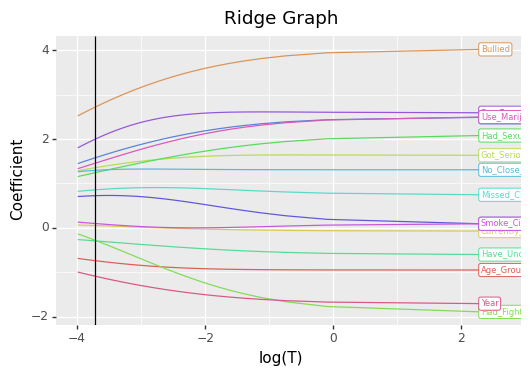

<ggplot: (8753361358228)>

In [44]:
(p9.ggplot(ridge_plt_melt, p9.aes(x = 'Threshold', y = 'Coefficient', color = 'Variable')) +
p9.geom_line() +
p9.scale_x_continuous(name = "log(T)", limits = [-4, 2.6]) +
p9.geom_vline(xintercept = np.log(1/cl.alpha_)) +
p9.theme(legend_position = "none", figure_size = [6, 3.75]) +
p9.ggtitle("Ridge Graph") +
p9.geom_label(inherit_aes = False, data = plt_label, ha = 'left',
              mapping = p9.aes(label = 'Variable', x = np.log(1/0.1), #
                            y = 'Coefficient', color = 'Variable', size = 1)))

The Ridge Regression does not show the predictors converging at low values of log(T) as expected. Further, more predictors than expected would be included in the model based on this plot

In [45]:
cross_val_score(tempmodel, X, Y, cv=10, scoring = "neg_mean_squared_error").mean()

-45.79133063044238

**Week 6: Inital Passes at Neural Networks**

In [46]:
# Neural Networks - Build 1
from sklearn.model_selection import cross_val_score, RepeatedKFold
import keras
import tensorflow as tf
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

def buildmodel():
    modelk = keras.Sequential([
        keras.layers.Dense(4, input_dim = 15, activation='relu'),
        keras.layers.Dense(1, activation = 'relu')])
    modelk.compile(loss='mean_squared_error', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])
    return(modelk)

estimator1 = KerasRegressor(build_fn = buildmodel, epochs = 10, batch_size = 100, verbose = 0)

kfold = RepeatedKFold(n_splits = 10, n_repeats = 1)
cross_val_score(estimator1, X_pp, Y, cv=kfold, scoring = 'neg_mean_squared_error').mean()

-291.42508378514265

In [47]:
# Neural Networks - Build 2

def buildmodel2():
    modelk = keras.Sequential([
        keras.layers.Dense(4, input_dim = 15, activation='relu'),
        keras.layers.Dense(8, activation = 'relu'),
        keras.layers.Dense(1, activation = 'relu')])
    modelk.compile(loss='mean_squared_error', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])
    return(modelk)

estimator2 = KerasRegressor(build_fn = buildmodel2, epochs = 10, batch_size = 100, verbose = 0)

kfold = RepeatedKFold(n_splits = 10, n_repeats = 1)
cross_val_score(estimator2, X_pp, Y, cv=kfold, scoring = 'neg_mean_squared_error').mean()


-289.1654836119433

In [48]:
def buildmodel3():
    modelk = keras.Sequential([
        keras.layers.Dense(4, input_dim = 15, activation='relu'),
        keras.layers.Dense(8, activation = 'relu'),
        keras.layers.Dense(1, activation = 'relu')])
    modelk.compile(loss='mean_squared_error', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])
    return(modelk)

estimator3 = KerasRegressor(build_fn = buildmodel3, epochs = 10, batch_size = 100, verbose = 0)

kfold = RepeatedKFold(n_splits = 10, n_repeats = 1)
cross_val_score(estimator3, X_pp, Y, cv=kfold, scoring = 'neg_mean_squared_error').mean()

-289.596897665253

In [49]:
def buildmodel4():
    modelk = keras.Sequential([
        keras.layers.Dense(4, input_dim = 15, activation='relu'),
        keras.layers.Dense(8, activation = 'relu'),
        keras.layers.Dense(16, activation = 'relu'),
        keras.layers.Dense(1, activation = 'relu')])
    modelk.compile(loss='mean_squared_error', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])
    return(modelk)

estimator4 = KerasRegressor(build_fn = buildmodel4, epochs = 10, batch_size = 100, verbose = 0)

kfold = RepeatedKFold(n_splits = 10, n_repeats = 1)
cross_val_score(estimator4, X_pp, Y, cv=kfold, scoring = 'neg_mean_squared_error').mean()

-289.4178806526621

In [50]:
def buildmodel5():
    modelk = keras.Sequential([
        keras.layers.Dense(4, input_dim = 15, activation='relu'),
        keras.layers.Dense(8, activation = 'relu'),
        keras.layers.Dense(16, activation = 'relu'),
        keras.layers.Dense(32, activation = 'relu'),
        keras.layers.Dense(1, activation = 'relu')])
    modelk.compile(loss='mean_squared_error', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])
    return(modelk)

estimator5 = KerasRegressor(build_fn = buildmodel5, epochs = 10, batch_size = 100, verbose = 0)

kfold = RepeatedKFold(n_splits = 10, n_repeats = 1)
cross_val_score(estimator5, X_pp, Y, cv=kfold, scoring = 'neg_mean_squared_error').mean()

-295.3301139290042

**Week 7: Clustering**

In [51]:
mental = pd.read_csv("GHSH_Pooled_Data1.csv", index_col = 'Attempted_suicide')
mental = pd.get_dummies(mental, columns = ['Age Group', 'Sex'])
mental = mental.rename(columns = {'Age Group_13-15': 'Age_Group_13-15','Age Group_16-17': 'Age_Group_16-17'})
mental = mental.drop(columns={'Country'})

In [52]:
mental = mental.dropna()
mental

,Year,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Age_Group_13-15,Age_Group_16-17,Sex_Female,Sex_Male
Attempted_suicide,,,,,,,,,,,,,,,,,
12.9,2012,49.3,28.9,35.9,10.6,46.2,32.0,43.5,17.0,44.2,42.1,24.8,6.1,1,0,0,1
18.9,2012,50.7,26.8,21.8,6.5,49.9,29.4,30.7,20.5,24.7,25.2,24.2,4.3,1,0,1,0
14.4,2016,38.0,19.3,12.7,0.8,35.7,18.8,31.8,5.1,32.1,47.4,48.4,10.8,1,0,0,1
9.6,2016,42.4,16.8,18.3,0.2,39.7,6.5,14.2,1.3,27.3,51.5,40.4,14.2,1,0,1,0
13.4,2016,46.5,29.6,3.3,2.1,33.3,17.3,35.7,6.9,28.8,43.3,51.0,9.7,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19.5,2011,5.8,4.7,13.6,1.9,20.2,44.6,8.4,8.2,41.8,66.5,57.4,14.3,1,0,1,0
14.7,2015,32.2,35.5,60.5,4.0,36.3,32.7,32.0,25.7,48.7,30.2,51.2,4.1,1,0,0,1
16.9,2015,24.4,27.1,63.0,2.0,36.3,16.2,13.6,29.9,22.9,30.9,41.7,3.3,1,0,1,0


In [53]:
mental.describe()

,Year,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Age_Group_13-15,Age_Group_16-17,Sex_Female,Sex_Male
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2014.640000,30.85900,20.575000,23.229000,7.219000,32.624000,30.273000,25.898000,15.314000,32.680000,31.118000,44.092100,7.826000,0.580000,0.420000,0.500000,0.500000
std,1.977244,54.75516,14.091694,16.045008,8.594251,11.627641,10.778185,16.989123,10.804919,15.543578,14.327817,15.067355,4.474227,0.496045,0.496045,0.502519,0.502519
min,2010.000000,1.40000,0.800000,3.300000,0.000000,5.600000,6.500000,2.500000,1.200000,3.500000,9.900000,15.200000,1.500000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,10.22500,8.350000,11.275000,1.900000,25.300000,22.750000,12.200000,6.875000,21.250000,21.575000,34.800000,4.375000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,23.80000,18.200000,21.000000,4.100000,32.400000,29.200000,21.900000,12.350000,29.400000,26.850000,42.700000,7.050000,1.000000,0.000000,0.500000,0.500000
75%,2016.000000,40.60000,29.050000,30.200000,8.750000,39.825000,36.900000,36.500000,21.600000,42.875000,41.650000,53.350000,10.000000,1.000000,1.000000,1.000000,1.000000
max,2017.000000,548.00000,55.300000,70.600000,43.200000,63.900000,62.200000,73.900000,43.800000,76.500000,78.600000,87.700000,24.800000,1.000000,1.000000,1.000000,1.000000


In [54]:
random.seed(100)
from sklearn.cluster import KMeans

inertias = []

mk = range(1, 10)
for i in mk:
    kmeans = KMeans(n_clusters=i, n_init = 20)
    clusters = kmeans.fit(mental)
    inertias.append(clusters.inertia_)

In [55]:
choosek = pd.DataFrame()
choosek['kvalues'] = mk
choosek['inertias'] = inertias

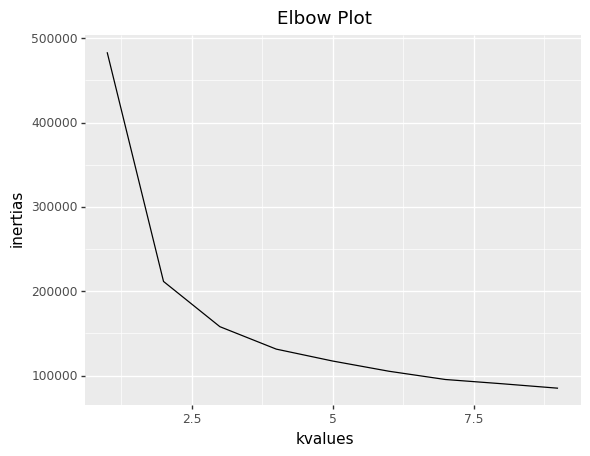

In [56]:
print(p9.ggplot(choosek, p9.aes(x='kvalues', y = 'inertias' )) +
       p9.geom_line() +
      p9.ggtitle("Elbow Plot") )

In [57]:
kmeans2 = KMeans(n_clusters=3, n_init = 20)
clust_2 = kmeans2.fit(mental)

In [58]:
clust_2.labels_

array([0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2,
 2, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0,
 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2,
 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0], dtype=int32)

In [59]:
mental.index[clust_2.labels_ == 0]

Float64Index([12.9, 18.9, 14.4, 13.4, 10.9,  9.7, 12.3, 12.1, 12.8, 13.2, 21.8,
              29.8,  9.4,  9.2, 29.9, 25.2, 24.4, 12.0, 24.0, 19.7, 67.2, 53.7,
              19.8, 20.5, 13.9, 17.8, 11.5, 23.4, 11.5,  9.5, 10.4, 12.2, 16.3,
               7.4, 30.3, 23.1, 16.7, 28.3, 14.7,  9.0, 16.2],
             dtype='float64', name='Attempted_suicide')

In [60]:
mental.index[clust_2.labels_ == 1]

Float64Index([16.1], dtype='float64', name='Attempted_suicide')

In [61]:
mental.index[clust_2.labels_ == 2]

Float64Index([ 9.6, 14.1, 10.3, 14.0,  4.5,  5.9,  4.5,  9.6, 20.1, 24.3, 11.6,
               8.0, 11.2,  4.4,  3.6,  3.7,  2.7, 20.6, 31.5,  4.9,  6.9,  3.8,
               5.5,  6.6,  7.4,  5.7,  6.7, 11.5, 16.5, 10.9,  7.7, 10.4, 11.6,
               7.2,  9.4, 23.8,  9.4, 10.4,  7.4, 11.7, 22.0, 20.7, 21.0,  7.9,
              10.9, 16.0, 12.8, 10.5,  9.6,  8.2,  7.8, 17.9, 17.5,  3.6, 10.8,
              18.6, 19.5, 16.9],
             dtype='float64', name='Attempted_suicide')

In [62]:
from sklearn.cluster import AgglomerativeClustering
clust_3 = AgglomerativeClustering(distance_threshold = 0, n_clusters = None,
linkage = 'complete').fit(mental)

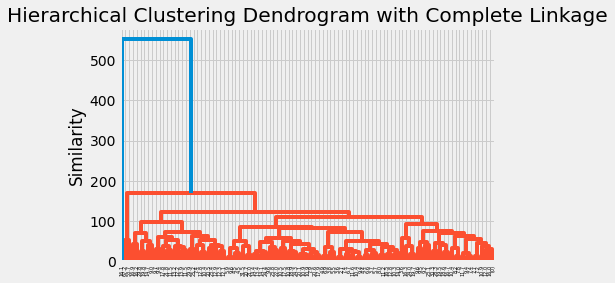

In [63]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1 
        else:
            current_count += counts[child_idx - n_samples]
            counts[i] = current_count
            linkage_matrix = np.column_stack(
            [model.children_, model.distances_, counts]
            ).astype(float)
    dendrogram(linkage_matrix, **kwargs)

plt.figure()
plt.title("Hierarchical Clustering Dendrogram with Complete Linkage")
plt.ylabel("Similarity")
plot_dendrogram(clust_3, truncate_mode = "level", p = 12,
labels = mental.index)